<a href="https://colab.research.google.com/github/tainabueno/machine_learning/blob/master/An%C3%A1lise_dos_Dados_do_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="tainabueno" src="https://66.media.tumblr.com/0e195e8b6bbd58812d672f5b02f008f4/tumblr_inline_q5lxbhksV41qb19nt_500.png"></center> 


# Análise dos Dados do Airbnb da Cidade de **Buenos Aires**




O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.revistahoteis.com.br/wp-content/uploads/2017/08/airbnb.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires na Argentina, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2019-11-25/visualisations/listings.csv')

## Análise dos Dados


In [197]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

* `id`: número do id dado a propiedade.
* `name`: nome da propriedade anunciada.
* `host_id`: nome de id do anfitrião.
* `host_name`: nome do anfitrião.
* `neighbourhood_group`: coluna sem valor válido.
* `neighbourhood`: nome do bairro.
* `latitude`: coordenada latitude do imóvel.
* `longitude`: coordenada longititude do imóvel.
* `room_type`: informa o tipo de hospedagem.
* `price`: o preço para alugar o quarto.
* `minimum_nights`: quantidade mínima de noites para reservar.
* `number_of_reviews`: quantidade dos reviews.
* `last_review`: data do último review.
* `reviews_per_month`: quantidade de reviews por mês.
* `calculated_host_listings_count`: quantidade de imóveis do mesmo anfitrião.
* `availability_365`: número de dias disponíveis em 365 dias.



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [198]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,NaN,Palermo,-34.58241,-58.43382,Entire home/apt,2033,20,14,2018-04-30,0.15,1,363
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58225,-58.42460,Entire home/apt,3588,2,25,2019-08-13,0.28,1,281
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1435,1,20,2017-12-11,0.17,1,365
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2691,1,1,2018-12-18,0.09,7,360
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2691,1,0,NaN,NaN,7,360


In [199]:
# mostrar apenas a entrada de uma célula, nesse caso neighbourhood
df['neighbourhood'].unique()

array(['Palermo', 'Recoleta', 'Monserrat', 'Nuñez', 'Balvanera',
       'Belgrano', 'San Nicolas', 'San Telmo', 'Constitucion',
       'Puerto Madero', 'Chacarita', 'Villa Crespo', 'Retiro',
       'San Cristobal', 'Almagro', 'Colegiales', 'Boedo', 'Caballito',
       'Villa Ortuzar', 'Nueva Pompeya', 'Parque Chacabuco', 'Barracas',
       'Villa Urquiza', 'Coghlan', 'Parque Patricios', 'Boca', 'Saavedra',
       'Villa Devoto', 'Flores', 'Monte Castro', 'Velez Sarsfield',
       'Villa Gral. Mitre', 'Parque Chas', 'Floresta', 'Paternal',
       'Villa Del Parque', 'Versalles', 'Mataderos', 'Villa Pueyrredon',
       'Agronomia', 'Parque Avellaneda', 'Villa Luro', 'Liniers',
       'Villa Lugano', 'Villa Santa Rita', 'Villa Real',
       'Villa Riachuelo', 'Villa Soldati'], dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

A intenção é identificar a quantidade de entradas que nosso conjunto de dados possui e os tipos de cada coluna.

Este *dataset* é uma versão "resumida" do Airbnb, arquivo: `listings.csv`. A versão mais completa, arquivo: (`listings.csv.gz`).

In [200]:
# identificar o volume de dados do DataFrame
df.items

<bound method DataFrame.items of              id  ... availability_365
0          7270  ...              363
1         11508  ...              281
2         12463  ...              365
3         13095  ...              360
4         13096  ...              360
...         ...  ...              ...
22872  40350240  ...              178
22873  40351237  ...              143
22874  40351485  ...                5
22875  40351815  ...              152
22876  40352426  ...              333

[22877 rows x 16 columns]>

In [201]:
# identificar o volume de dados do DataFrame
df.shape

(22877, 16)

Este *dataset* possui 22877 linhas por 16 colunas.

In [202]:
# identificar o volume de dados do DataFrame

print('Variáveis: {}'.format(df.shape[0]))
print('Entradas: {}'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Variáveis: 22877
Entradas: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 30% das linhas.
* As variáveis `name` e `host_name` têm menos de 0,1% dos valores nulos.

In [203]:
# quantidade de valores ausentes em somatória
df.isnull().sum()

id                                    0
name                                 10
host_id                               0
host_name                            23
neighbourhood_group               22877
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        6445
reviews_per_month                  6445
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [204]:
# quantidade de valores ausentes em porcentagem ordenado em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.281724
last_review                       0.281724
host_name                         0.001005
name                              0.000437
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

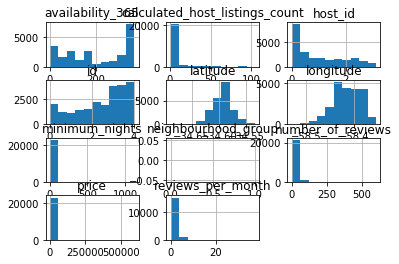

In [205]:
# plotar o histograma das variáveis numéricas
df.hist();

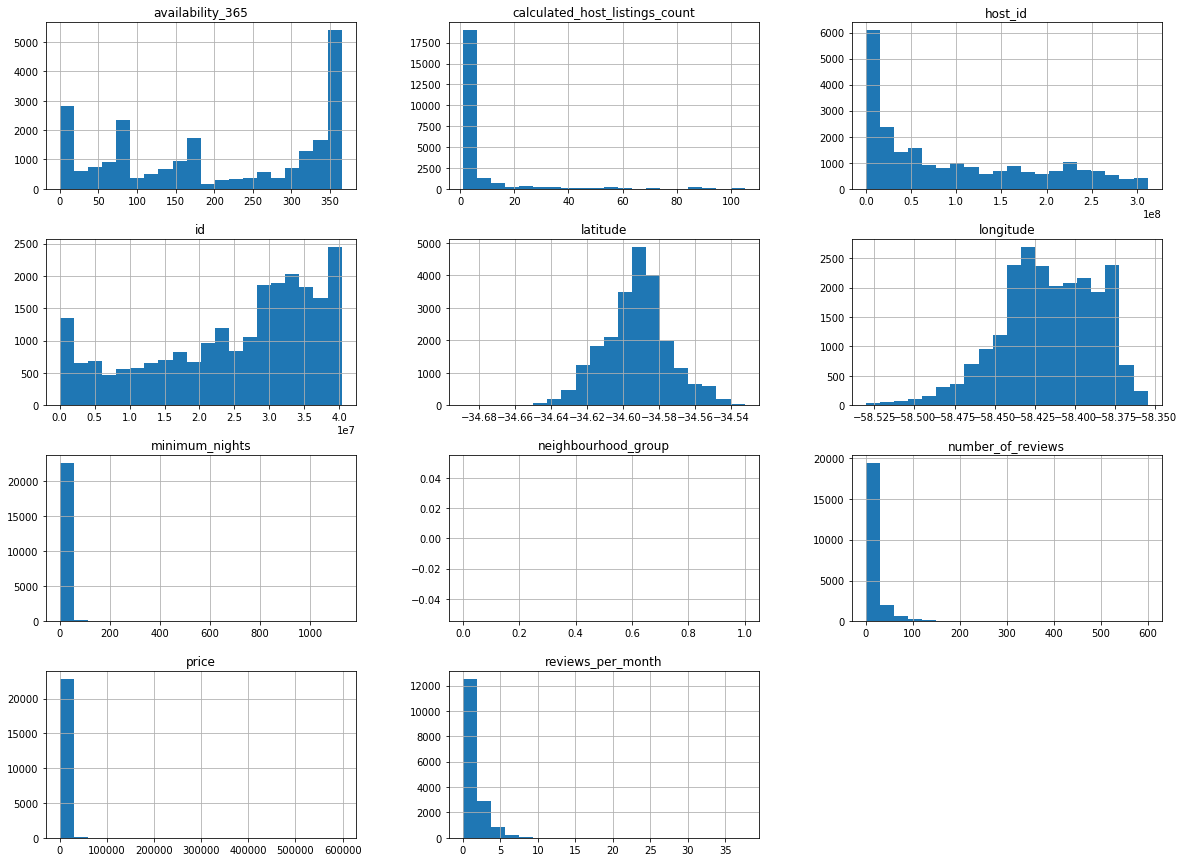

In [206]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(20,15));

### **Q4. Qual a média dos preços de aluguel? Há outliers presentes?**

A média de preços `price` é de 3214 pesos ARS, em torno de R$228 BRL a diária.

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [207]:
# ver a média da coluna `price`
df['price'].describe()

count     22877.000000
mean       3214.630196
std       12364.429880
min         120.000000
25%        1196.000000
50%        1973.000000
75%        2990.000000
max      597865.000000
Name: price, dtype: float64

In [208]:
# ver o resumo estatístico das variáveis numéricas
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.287700e+04,2.287700e+04,0.0,22877.000000,22877.000000,22877.000000,22877.000000,22877.000000,16432.000000,22877.000000,22877.000000
mean,2.487670e+07,9.739731e+07,NaN,-34.592534,-58.416364,3214.630196,5.653233,15.482974,1.266434,6.296062,202.064912
std,1.191191e+07,9.274044e+07,NaN,0.018304,0.029937,12364.429880,21.513176,31.268565,1.440429,14.748998,134.161675
min,7.270000e+03,2.616000e+03,NaN,-34.688950,-58.530200,120.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.631899e+07,1.363528e+07,NaN,-34.603400,-58.435630,1196.000000,1.000000,0.000000,0.250000,1.000000,83.000000
50%,2.856388e+07,6.212518e+07,NaN,-34.591830,-58.415950,1973.000000,3.000000,4.000000,0.760000,1.000000,180.000000
75%,3.454449e+07,1.713546e+08,NaN,-34.581970,-58.392220,2990.000000,4.000000,16.000000,1.810000,4.000000,343.000000
max,4.035243e+07,3.118884e+08,NaN,-34.532720,-58.354880,597865.000000,1125.000000,600.000000,37.580000,105.000000,365.000000


In [209]:
# resumo estatístico das variáveis numéricas, entradas de interesse 
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22877.000000,22877.000000,22877.000000,16432.000000,22877.000000,22877.000000
mean,3214.630196,5.653233,15.482974,1.266434,6.296062,202.064912
std,12364.429880,21.513176,31.268565,1.440429,14.748998,134.161675
min,120.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1196.000000,1.000000,0.000000,0.250000,1.000000,83.000000
50%,1973.000000,3.000000,4.000000,0.760000,1.000000,180.000000
75%,2990.000000,4.000000,16.000000,1.810000,4.000000,343.000000
max,597865.000000,1125.000000,600.000000,37.580000,105.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A quantidade mínima de noites (minimum_nights) está acima do limite real de 365 dias no ano.

#### Boxplot para minimum_nights

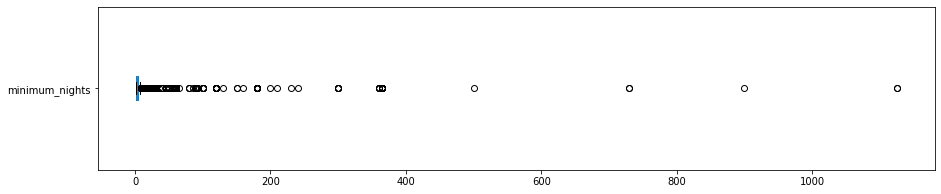

minimum_nights: valores acima de 20: 
1020 entradas
4.4586% entradas


In [210]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nigths
print('minimum_nights: valores acima de 20: ')
print('{} entradas'.format(len(df[df.minimum_nights > 20])))
print('{:.4f}% entradas'.format(len(df[df.minimum_nights > 20]) / df.shape[0]*100))

A variável `price` possui 75% do valor abaixo de 2990 pesos, porém seu valor máximo é 597865 pesos.

#### Boxplot para price

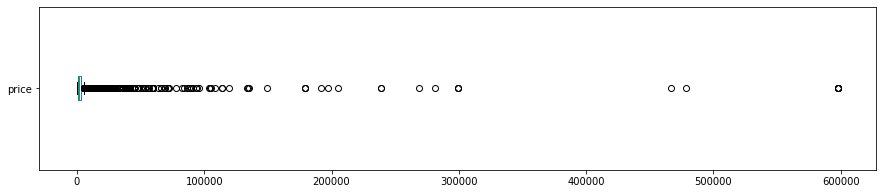

price: valores acima de 5000: 
2435 entradas
10.643878130873803%


In [211]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3));
plt.show()

#ver quantidade de valores acima de 5000 para price
print('price: valores acima de 5000: ')
print('{} entradas'. format(len(df[df.price > 5000])))
print('{}%'.format(len(df[df.price > 5000]) / df.shape[0]*100))

**Histograma *sem outliers*** 

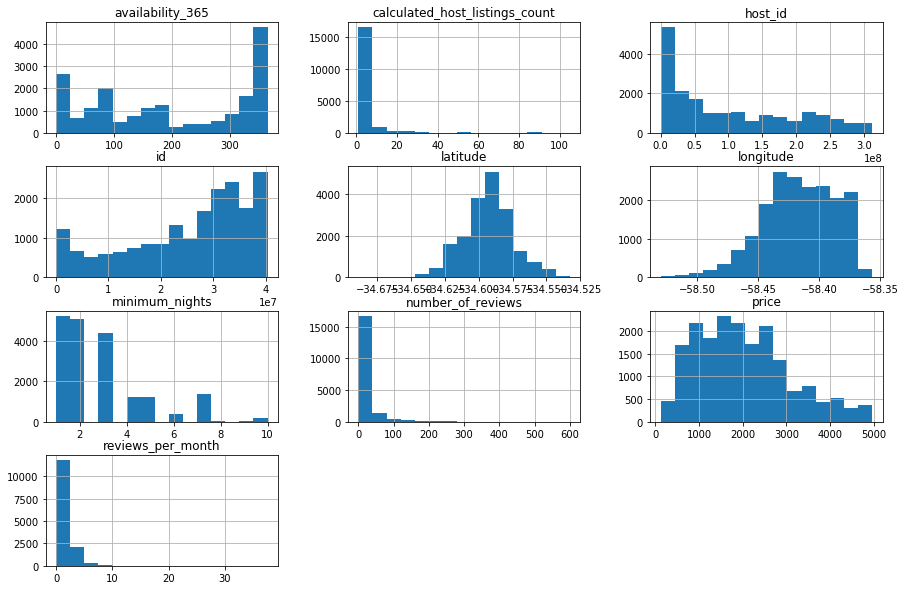

In [212]:
# remover os `outliers` em um novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 5000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 10].index, axis=0, inplace=True)

# remover `neighbourhood_group` porque está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [213]:
# matriz de correlação completa
df_clean.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.518801,0.011223,-0.044752,-0.093261,-0.125196,-0.374813,0.272511,0.005521,-0.122591
host_id,0.518801,1.000000,-0.060215,-0.023161,-0.147162,-0.134921,-0.191011,0.169560,-0.155800,-0.084675
latitude,0.011223,-0.060215,1.000000,-0.519267,0.141061,0.028901,0.015547,0.032632,0.020145,-0.029258
longitude,-0.044752,-0.023161,-0.519267,1.000000,0.091831,0.004736,0.080759,0.069615,0.053974,0.064794
price,-0.093261,-0.147162,0.141061,0.091831,1.000000,0.062265,0.069981,0.019835,0.194052,0.145222
minimum_nights,-0.125196,-0.134921,0.028901,0.004736,0.062265,1.000000,-0.115477,-0.260875,0.118292,-0.014289
number_of_reviews,-0.374813,-0.191011,0.015547,0.080759,0.069981,-0.115477,1.000000,0.490739,-0.047749,0.060422
reviews_per_month,0.272511,0.169560,0.032632,0.069615,0.019835,-0.260875,0.490739,1.000000,-0.088992,-0.066163
calculated_host_listings_count,0.005521,-0.155800,0.020145,0.053974,0.194052,0.118292,-0.047749,-0.088992,1.000000,0.101567
availability_365,-0.122591,-0.084675,-0.029258,0.064794,0.145222,-0.014289,0.060422,-0.066163,0.101567,1.000000


In [214]:
# criar uma matriz de correlação com as entradas de interesse
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr();

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.062265,0.069981,0.019835,0.194052,0.145222
minimum_nights,0.062265,1.000000,-0.115477,-0.260875,0.118292,-0.014289
number_of_reviews,0.069981,-0.115477,1.000000,0.490739,-0.047749,0.060422
reviews_per_month,0.019835,-0.260875,0.490739,1.000000,-0.088992,-0.066163
calculated_host_listings_count,0.194052,0.118292,-0.047749,-0.088992,1.000000,0.101567
availability_365,0.145222,-0.014289,0.060422,-0.066163,0.101567,1.000000


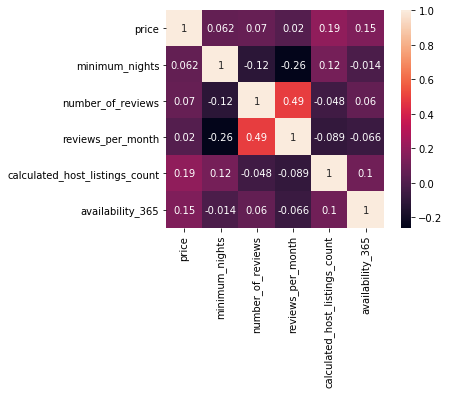

In [215]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

A quantidade de imóveis inteiros passa dos 70% em Buenos Aires.

In [216]:
df_clean.price == df_clean['price']

1        True
2        True
3        True
4        True
5        True
         ... 
22872    True
22873    True
22874    True
22875    True
22876    True
Name: price, Length: 18971, dtype: bool

In [217]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    14101
Private room        4138
Shared room          499
Hotel room           233
Name: room_type, dtype: int64

In [218]:
df_clean['room_type'].value_counts()

Entire home/apt    14101
Private room        4138
Shared room          499
Hotel room           233
Name: room_type, dtype: int64

In [219]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.743292
Private room       0.218122
Shared room        0.026303
Hotel room         0.012282
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros `neighbourhoods` a partir do preço de locação.

In [220]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean()

neighbourhood
Agronomia            1345.352941
Almagro              1565.925508
Balvanera            1641.704154
Barracas             1775.649007
Belgrano             1956.382857
Boca                 1408.155963
Boedo                1315.421569
Caballito            1477.790244
Chacarita            1864.949008
Coghlan              1743.506024
Colegiales           1850.810526
Constitucion         1565.749141
Flores               1186.920000
Floresta             1691.102564
Liniers              1925.300000
Mataderos            1363.300000
Monserrat            1933.932584
Monte Castro         1315.421053
Nueva Pompeya        1829.600000
Nuñez                1954.200573
Palermo              2328.962138
Parque Avellaneda     916.666667
Parque Chacabuco     1501.613636
Parque Chas          1478.645833
Parque Patricios     1215.459016
Paternal              947.538462
Puerto Madero        3178.397590
Recoleta             2233.605849
Retiro               2276.860963
Saavedra             1406.368

In [221]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.median()

neighbourhood
Agronomia            1196.0
Almagro              1435.0
Balvanera            1435.0
Barracas             1495.0
Belgrano             1794.0
Boca                 1196.0
Boedo                1166.0
Caballito            1315.0
Chacarita            1734.0
Coghlan              1555.0
Colegiales           1794.0
Constitucion         1495.0
Flores                897.0
Floresta             1256.0
Liniers              1734.0
Mataderos            1016.0
Monserrat            1794.0
Monte Castro         1076.0
Nueva Pompeya        1076.0
Nuñez                1794.0
Palermo              2212.0
Parque Avellaneda     896.5
Parque Chacabuco     1196.0
Parque Chas          1226.0
Parque Patricios     1016.0
Paternal              688.0
Puerto Madero        3289.0
Recoleta             2093.0
Retiro               2093.0
Saavedra             1196.0
San Cristobal        1136.0
San Nicolas          1794.0
San Telmo            1824.0
Velez Sarsfield      1375.0
Versalles            1913.0
Villa 

In [222]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Villa Soldati    3527.666667
Puerto Madero    3178.397590
Palermo          2328.962138
Retiro           2276.860963
Recoleta         2233.605849
San Telmo        2022.244863
Belgrano         1956.382857
Nuñez            1954.200573
San Nicolas      1949.710616
Monserrat        1933.932584
Liniers          1925.300000
Chacarita        1864.949008
Colegiales       1850.810526
Nueva Pompeya    1829.600000
Barracas         1775.649007
Name: price, dtype: float64

In [0]:
## df_clean.groupby(['neighbourhood'].room_type.value_counts(ascending=False)[:20]??
## aqui eu gostaria de ordenar o bairro pelo tipo de imóveis

Podemos observar abaixo que a Villa Soldati possui apenas 3 imóveis e com valores mais altos que os demais bairros em comparação. Dois destes valores estão quase o dobro do outro, o que pode sugerir que esta amostra pode ser não-representativa.

In [224]:
# ver quantidade de imóveis em cada bairro
print(df[df.neighbourhood == 'Villa Soldati'].shape)
print(df[df.neighbourhood == 'Puerto Madero'].shape)
print(df[df.neighbourhood == 'Palermo'].shape)
print(df[df.neighbourhood == 'Retiro'].shape)

# ver as 3 entradas do Villa Soldati
df[df.neighbourhood == "Villa Soldati"]

(3, 16)
(243, 16)
(6934, 16)
(1159, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15237,32548725,Departamento amplio y cómodo,226116702,Aneth,NaN,Villa Soldati,-34.66094,-58.43645,Entire home/apt,2392,1,0,NaN,NaN,2,179
17108,34492123,Muy buen hambiente..tranquilidad y espacio,260348454,Nilsa,NaN,Villa Soldati,-34.65855,-58.44305,Private room,4006,1,0,NaN,NaN,1,364
17470,34811527,Departamento capital federal 4 ambientes grandes,262448759,Fer,NaN,Villa Soldati,-34.66639,-58.44716,Private room,4185,1,0,NaN,NaN,1,365


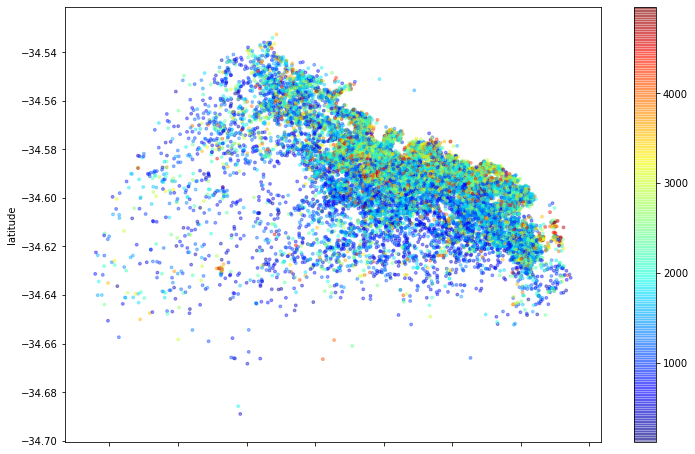

In [225]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean.price, s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

a média mínima de noites é de quase 3 dias.

In [226]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.8004322386800906

## Conclusões



Esta foi ua análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.